In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_auc_score,roc_curve

In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### problem statement

#### To find the passenger from TITANIC is survived or not servived

### Exploratory Data Analysis

In [4]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df["Age"].median()

28.0

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### fill the Nan value from the columns with mean or median

In [9]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df["Embarked"].nunique()

3

In [12]:
df["Embarked"].mode()[0]

'S'

In [13]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

### To find the outlier and remove it by different technique

<AxesSubplot:>

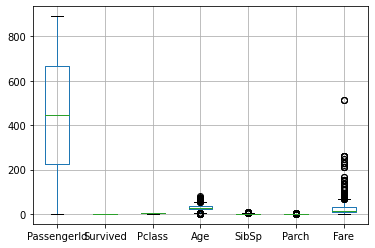

In [14]:
df.boxplot(figsize=(10,5))

In [15]:
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+2.5*iqr
lower_limit=q1-1.5*iqr
lower_limit
upper_limit

67.5

In [16]:
df[["Age"]].loc[df["Age"]>upper_limit]

,Age
96,71.0
116,70.5
493,71.0
630,80.0
672,70.0
745,70.0
851,74.0


In [17]:
df.loc[df["Age"]>upper_limit,"Age"]=upper_limit

In [18]:
df[["Age"]].loc[df["Age"]<lower_limit]

,Age
7,2.00
16,2.00
78,0.83
119,2.00
164,1.00
172,1.00
183,1.00
205,2.00
297,2.00
305,0.92


In [19]:
df.loc[df["Age"]<lower_limit,"Age"]=lower_limit

In [20]:
df[["Age"]].loc[df["Age"]>upper_limit]


,Age


<AxesSubplot:>

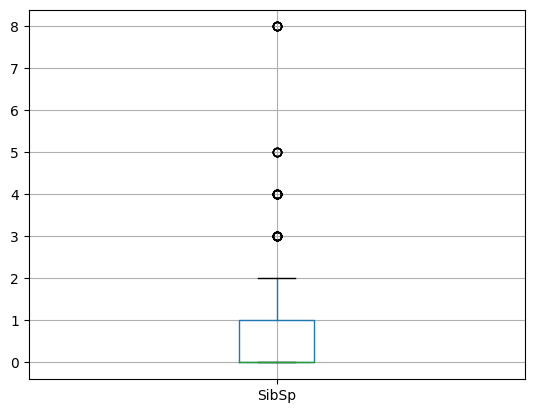

In [21]:
df[["SibSp"]].boxplot()

In [22]:
q1=df["SibSp"].quantile(0.25)
q3=df["SibSp"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+3*iqr
upper_limit

4.0

In [23]:
df[["SibSp"]].loc[df["SibSp"]>upper_limit]

,SibSp
59,5
71,5
159,8
180,8
201,8
324,8
386,5
480,5
683,5
792,8


In [24]:
df.loc[df["SibSp"]>upper_limit,"SibSp"]=upper_limit

<AxesSubplot:>

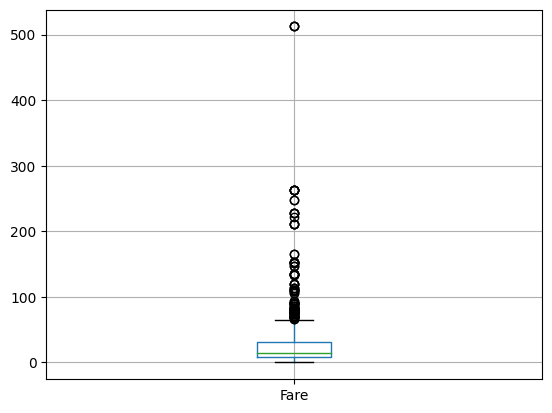

In [25]:
df[["Fare"]].boxplot()

In [26]:
q1=df["Fare"].quantile(0.25)
q3=df["Fare"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+3*iqr
upper_limit

100.2688

In [27]:
df[["Fare"]].loc[df["Fare"]>upper_limit]
df.loc[df["Fare"]>upper_limit,"Fare"]=upper_limit

<AxesSubplot:>

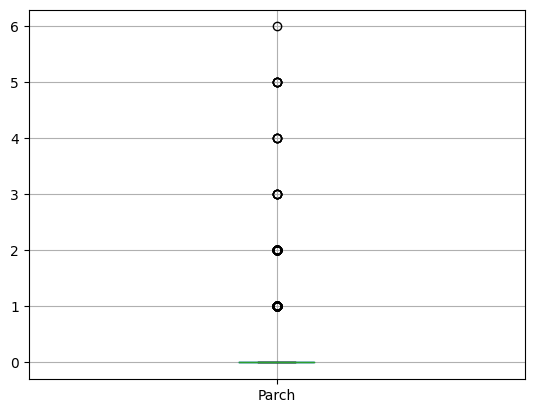

In [28]:
df[["Parch"]].boxplot()

### Encoding

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df["Gender"].value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [31]:
df["Gender"].replace({"male":1,"female":0},inplace=True)

In [86]:
dict1={"male":1,"female":0}

In [32]:
df=pd.get_dummies(df,columns=["Embarked"])

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [34]:
df["Ticket"].nunique()

681

In [37]:
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Gender       891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


### Train test split

In [82]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

### model training

In [42]:
logistic_model=LogisticRegression()

In [43]:
logistic_model.fit(x_train,y_train)

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Test the model

In [45]:
y_pred=logistic_model.predict(x_test)
y_pred_train=logistic_model.predict(x_train)

### prediction probabilities

In [47]:
y_pred_probabilities=logistic_model.predict_proba(x_test)
y_pred_train_probabilities=logistic_model.predict_proba(x_train)y_pred_train_probabilities

In [53]:
df1=pd.DataFrame()
df1["prediction"]=y_pred
s1=pd.Series(y_test)
s1=s1.reset_index(drop=True)
df1["actual"]=s1
df1

,prediction,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
174,0,1
175,0,0
176,0,0
177,0,0


In [57]:
df2=pd.DataFrame(y_pred_probabilities,columns=["class_pred_0","class_pred_1"])
df2["prediction"]=y_pred
df2

,class_pred_0,class_pred_1,prediction
0,0.783555,0.216445,0
1,0.742492,0.257508,0
2,0.555816,0.444184,0
3,0.385625,0.614375,1
4,0.891567,0.108433,0
...,...,...,...
174,0.596455,0.403545,0
175,0.879120,0.120880,0
176,0.877574,0.122426,0
177,0.894395,0.105605,0


### confusion matrix test

In [62]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix is \n",conf_matrix)

classificatio_report=classification_report(y_test,y_pred)
print("classification report is",classificatio_report)


confusion matrix is 
 [[97 13]
 [19 50]]
classification report is               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



### confusion matrix for train

In [63]:
conf_matrix_train=confusion_matrix(y_train,y_pred_train)
print("confusion matrix is \n",conf_matrix_train)

classificatio_report_train=classification_report(y_train,y_pred_train)
print("classification report is",classificatio_report_train)


confusion matrix is 
 [[373  64]
 [ 89 186]]
classification report is               precision    recall  f1-score   support

           0       0.81      0.85      0.83       437
           1       0.74      0.68      0.71       275

    accuracy                           0.79       712
   macro avg       0.78      0.76      0.77       712
weighted avg       0.78      0.79      0.78       712



### Auc and roc curve

In [70]:

fpr,tpr,thresh=roc_curve(y_train,y_pred_train_probabilities[:,1])

In [74]:
df_roc=pd.DataFrame()
df_roc["fpr"]=fpr
df_roc["tpr"]=tpr
df_roc["thresh"]=thresh
df_roc

,fpr,tpr,thresh
0,0.000000,0.000000,1.979549
1,0.000000,0.003636,0.979549
2,0.000000,0.018182,0.973934
3,0.002288,0.018182,0.972240
4,0.002288,0.120000,0.950750
...,...,...,...
195,0.945080,0.992727,0.063918
196,0.945080,0.996364,0.063808
197,0.965675,0.996364,0.056073
198,0.965675,1.000000,0.056033


<AxesSubplot:>

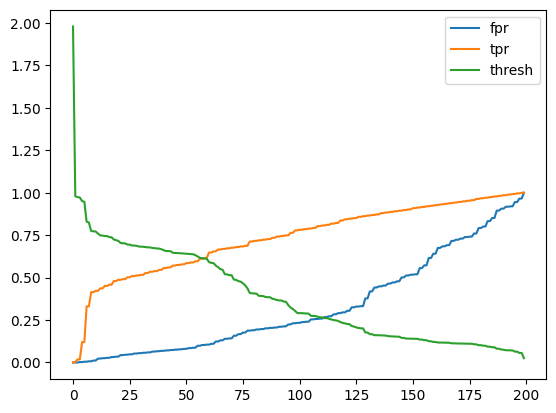

In [75]:
df_roc.plot(kind="line")

Text(0.5, 1.0, 'receiver operating characteristic curve')

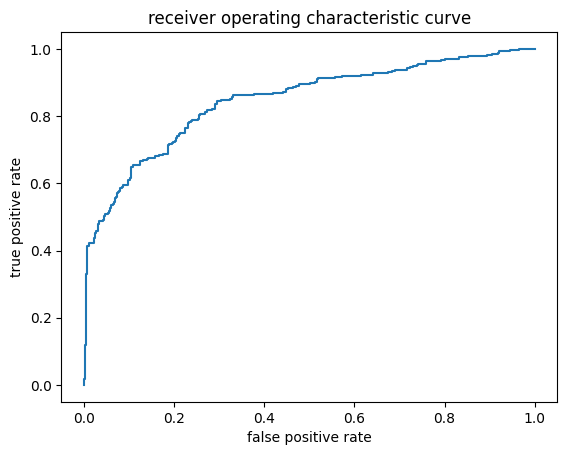

In [76]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("receiver operating characteristic curve")

In [78]:
auc_value=auc(fpr,tpr)
print("area under curve is",auc_value)    # good range of auc is 0.8 to 0.9
                                          # good model


area under curve is 0.8453505304763886


### User input

In [85]:
x.columns

Index(['PassengerId', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [87]:
dict1

{'male': 1, 'female': 0}

In [89]:
project_data={"Gender":dict1,"columns":list(x.columns)}
project_data

{'Gender': {'male': 1, 'female': 0},
 'columns': ['PassengerId',
  'Pclass',
  'Gender',
  'Age',
  'SibSp',
  'Parch',
  'Fare',
  'Embarked_C',
  'Embarked_Q',
  'Embarked_S']}

In [91]:
x.head(1).T

,0
PassengerId,1.00
Pclass,3.00
Gender,1.00
Age,22.00
SibSp,1.00
Parch,0.00
Fare,7.25
Embarked_C,0.00
Embarked_Q,0.00
Embarked_S,1.00


In [102]:
PassengerId=1.00
Pclass=3.00
Gender="male"
Age=22
SibSp=1.00
Parch=0.00
Fare=7.25
Embarked="C"

In [103]:
embarked="Embarked_"+Embarked

In [104]:
index_value=project_data["columns"].index(embarked)

In [94]:
array=np.zeros(len(project_data["columns"]))

In [98]:
project_data["Gender"][Gender]

1

In [106]:
array[0]=PassengerId
array[1]=Pclass
array[2]=project_data["Gender"][Gender]
array[3]=Age
array[4]=SibSp
array[5]=Parch
array[6]=Fare
array[index_value]=1

array


array([ 1.  ,  3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25,  1.  ,  0.  ,
        0.  ])

In [109]:
prediction=logistic_model.predict([array])

if prediction==1:
    print("person having this id is survived")
    
else:
    print("person is not suvived")

person is not suvived


C:\Program Files\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### pickle and json files

In [111]:
import pickle
import json
with open("logistic_model_titanic.pkl","wb")as f:
    pickle.dump(logistic_model,f)

In [112]:
with open ("project_data_titanic.json","w")as f:
    json.dump(project_data,f)